In [17]:
import polars as pl

In [18]:
pl.show_versions()

--------Version info---------
Polars:              1.6.0
Index type:          UInt32
Platform:            Windows-10-10.0.19045-SP0
Python:              3.12.5 | packaged by conda-forge | (main, Aug  8 2024, 18:24:51) [MSC v.1940 64 bit (AMD64)]

----Optional dependencies----
adbc_driver_manager  <not installed>
altair               5.4.1
cloudpickle          <not installed>
connectorx           <not installed>
deltalake            <not installed>
fastexcel            <not installed>
fsspec               <not installed>
gevent               <not installed>
great_tables         <not installed>
matplotlib           3.9.2
nest_asyncio         1.6.0
numpy                2.1.1
openpyxl             <not installed>
pandas               2.2.2
pyarrow              17.0.0
pydantic             <not installed>
pyiceberg            <not installed>
sqlalchemy           <not installed>
torch                <not installed>
xlsx2csv             <not installed>
xlsxwriter           <not installed>


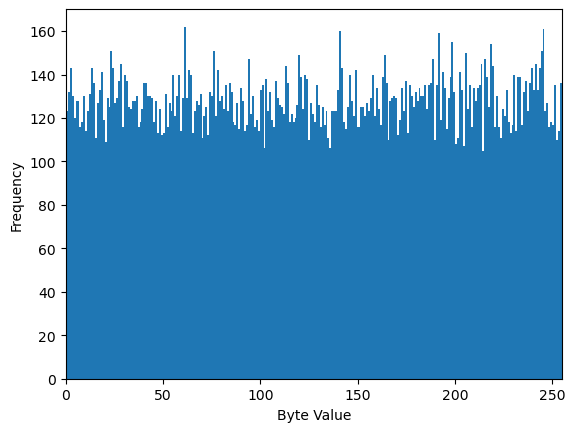

In [19]:
with open('random.bin', 'rb') as f:
    random = f.read()

pl.Series(random).cast(pl.UInt8).to_pandas().plot(kind='hist', bins=256, xlim=(0, 255), xlabel='Byte Value')

pass  # suppress output

In [20]:
def read_csv(path: str):
    return pl.scan_csv(path, has_header=False).rename({'column_1': 'ms'}).collect()['ms']


KIND = 'hist'
BINS = 200
XLABEL = 'Milliseconds'
XLIM = 0, 3
ALPHA = 0.6
LEGEND = True


class Data:
    runtime: str
    raw_for_loop: pl.Series
    for_of_loop: pl.Series
    array_method: pl.Series
    generator: pl.Series

    def __init__(self, runtime: str, prefix: str) -> None:
        self.runtime = runtime
        self.raw_for_loop = read_csv(f'{prefix}/raw-for-loop.csv')
        self.for_of_loop = read_csv(f'{prefix}/for-of-loop.csv')
        self.array_method = read_csv(f'{prefix}/array-method.csv')
        self.generator = read_csv(f'{prefix}/generator.csv')

    def plot_histogram(self):
        self.raw_for_loop.to_pandas().plot(
            kind=KIND,
            title=self.runtime,
            legend=LEGEND,
            bins=BINS,
            xlim=XLIM,
            xlabel=XLABEL,
            label='raw-for-loop',
            color='blue',
            edgecolor='blue',
            alpha=ALPHA,
        )
        self.for_of_loop.to_pandas().plot(
            kind=KIND,
            title=self.runtime,
            legend=LEGEND,
            bins=BINS,
            xlim=XLIM,
            xlabel=XLABEL,
            label='for-of-loop',
            color='orange',
            edgecolor='orange',
            alpha=ALPHA,
        )
        self.array_method.to_pandas().plot(
            kind=KIND,
            title=self.runtime,
            legend=LEGEND,
            bins=BINS,
            xlim=XLIM,
            xlabel=XLABEL,
            label='array-method',
            color='green',
            edgecolor='green',
            alpha=ALPHA,
        )
        self.generator.to_pandas().plot(
            kind=KIND,
            title=self.runtime,
            legend=LEGEND,
            bins=BINS,
            xlim=XLIM,
            xlabel=XLABEL,
            label='generator',
            color='red',
            edgecolor='red',
            alpha=ALPHA,
        )

In [21]:
# Loading all the data
node = Data('Node.js', 'node')
deno = Data('Deno', 'deno')
bun = Data('Bun', 'bun')

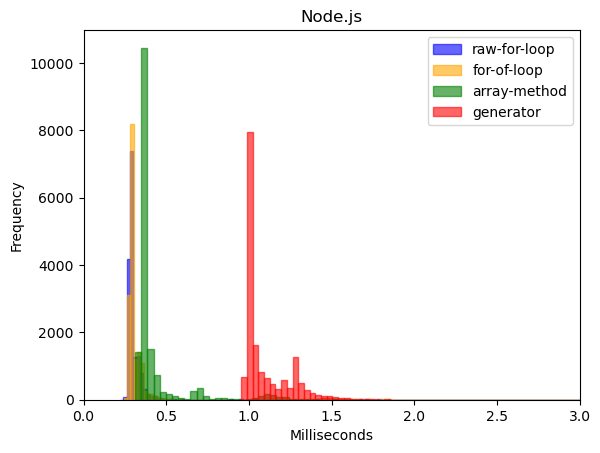

In [22]:
node.plot_histogram()

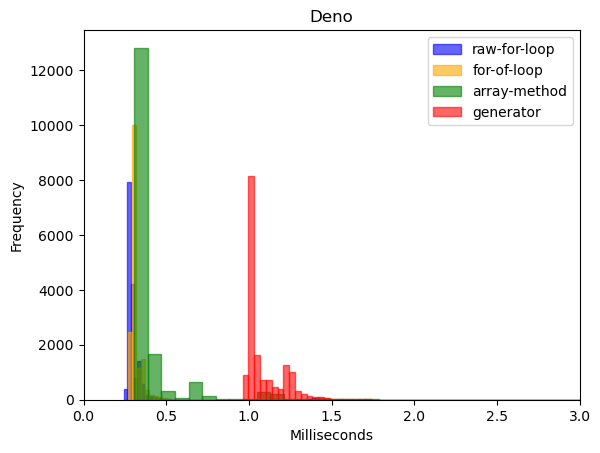

In [23]:
deno.plot_histogram()

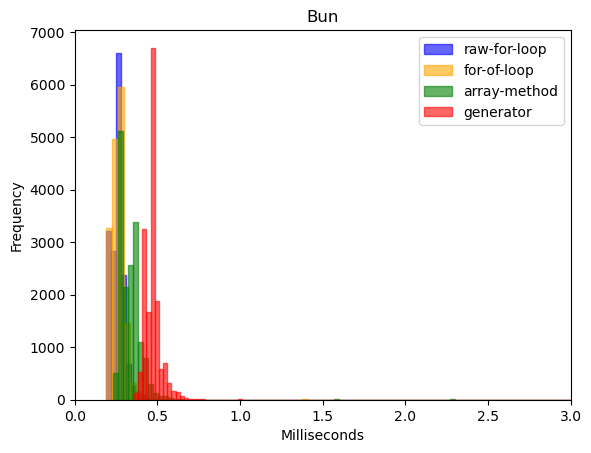

In [24]:
bun.plot_histogram()

In [25]:
def cohen_d(xs: pl.Series, ys: pl.Series):
    from math import sqrt

    mean_x, mean_y = xs.mean(), ys.mean()
    assert isinstance(mean_x, float)
    assert isinstance(mean_y, float)

    var_x, var_y = xs.var(), ys.var()
    assert isinstance(var_x, float)
    assert isinstance(var_y, float)

    n_x, n_y = len(xs), len(ys)
    return (mean_x - mean_y) / sqrt(((n_x - 1) * var_x + (n_y - 1) * var_y) / (n_x + n_y - 2))